In [1]:
#Import libraries
import geopandas
import pandas as pd
import descartes
from descartes.patch import PolygonPatch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from ipyleaflet import Map,Marker,CircleMarker,Heatmap
from random import uniform

## Plot hospitals using lat/long

In [2]:
#Read in hospitals csv file
df = pd.read_csv('./datasets/hospitals.csv')
df1=pd.read_csv('./datasets/morehosp.csv')

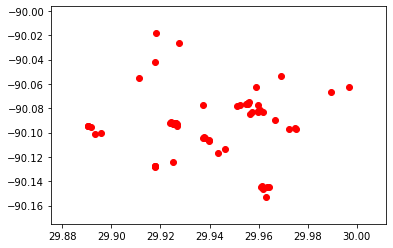

In [62]:
plt.scatter(df['lat'],df['lng'],c='red')


## Using KMeans clustering group hospitals near each other.

In [119]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=7, random_state=42)
km.fit(dff[['lat','lng']])


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [120]:
set(km.labels_)


{0, 1, 2, 3, 4, 5, 6}

In [121]:
dff['kmcluster'] = km.labels_


In [122]:
km.cluster_centers_


array([[ 29.96253822, -90.07875791],
       [ 30.00609181, -90.17694142],
       [ 30.01895565, -90.25559671],
       [ 29.92077025, -90.10390501],
       [ 29.96379544, -90.19713251],
       [ 29.91865128, -90.03545122],
       [ 29.96236273, -90.14611722]])

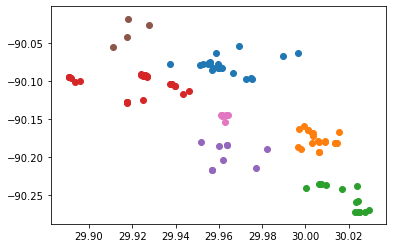

In [124]:
ax1 = plt.scatter(dff[dff["kmcluster"] == 0]["lat"], dff[dff["kmcluster"] == 0]["lng"])
ax2 = plt.scatter(dff[dff["kmcluster"] == 1]["lat"], dff[dff["kmcluster"] == 1]["lng"])
ax3 = plt.scatter(dff[dff["kmcluster"] == 2]["lat"], dff[dff["kmcluster"] == 2]["lng"])
ax3 = plt.scatter(dff[dff["kmcluster"] == 3]["lat"], dff[dff["kmcluster"] == 3]["lng"])
ax3 = plt.scatter(dff[dff["kmcluster"] == 4]["lat"], dff[dff["kmcluster"] == 4]["lng"])
ax3 = plt.scatter(dff[dff["kmcluster"] == 5]["lat"], dff[dff["kmcluster"] == 5]["lng"])
ax3 = plt.scatter(dff[dff["kmcluster"] == 6]["lat"], dff[dff["kmcluster"] == 6]["lng"])

ipyleaflet

In [99]:

m=Map(center =[29.917749,-90.128072],zoom=12)
for i in range(len(dff[['lat','lng']])):
    marker = Marker(location=[dff['lat'][i], dff['lng'][i]], draggable=False)
    m.add_layer(marker);

circle_marker = CircleMarker()
circle_marker.location = (29.917749,-90.128072)
circle_marker.radius = 75
circle_marker.color = "red"
circle_marker.fill_color = "red"
m.add_layer(circle_marker)    

circle_marker = CircleMarker()
circle_marker.location = (29.917749,-90.128072)
circle_marker.radius = 100
circle_marker.color = "yellow"
circle_marker.fill_color = "yellow" 
m.add_layer(circle_marker)
m


Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [94]:
destruction_map('29.9511,-90.0715',75)

In [5]:
dff= pd.concat([df,df1],ignore_index=True)

In [6]:
dff.drop_duplicates(inplace=True)

In [7]:
dff

,geometry,name,vicinity,types,lat,lng
0,"{'location': {'lat': 29.9177486, 'lng': -90.12...",Children's Hospital New Orleans,"200 Henry Clay Avenue, New Orleans","['hospital', 'point_of_interest', 'establishme...",29.917749,-90.128072
1,"{'location': {'lat': 29.8917868, 'lng': -90.09...",West Jefferson Medical Center,"1101 Medical Center Boulevard, Marrero","['hospital', 'point_of_interest', 'establishme...",29.891787,-90.095509
2,"{'location': {'lat': 29.9556817, 'lng': -90.07...",Tulane Medical Center,"1415 Tulane Avenue, New Orleans","['hospital', 'point_of_interest', 'establishme...",29.955682,-90.075830
3,"{'location': {'lat': 29.9266229, 'lng': -90.09...",Internal Medicine Specialist Inc.,"3525 Prytania Street, New Orleans","['hospital', 'health', 'point_of_interest', 'e...",29.926623,-90.092867
4,"{'location': {'lat': 29.9177892, 'lng': -90.12...",CHNOLA,"5720, 200 Henry Clay Avenue, New Orleans","['hospital', 'point_of_interest', 'establishme...",29.917789,-90.127685
5,"{'location': {'lat': 29.9395701, 'lng': -90.10...",Planned Parenthood - New Orleans Health Center,"4636 South Claiborne Avenue Ste 100, New Orleans","['hospital', 'point_of_interest', 'establishme...",29.939570,-90.106612
6,"{'location': {'lat': 29.9372464, 'lng': -90.10...",Ochsner Baptist,"2700 Napoleon Avenue, New Orleans","['hospital', 'point_of_interest', 'establishme...",29.937246,-90.104245
7,"{'location': {'lat': 29.8906192, 'lng': -90.09...",Heart Clinic Louisiana,"1111 Medical Center Boulevard, Marrero","['hospital', 'point_of_interest', 'establishme...",29.890619,-90.094537
8,"{'location': {'lat': 29.9372263, 'lng': -90.07...",Center for Restorative Breast Surgery,"1717 Saint Charles Avenue, New Orleans","['doctor', 'hospital', 'health', 'point_of_int...",29.937226,-90.077196
9,"{'location': {'lat': 29.924955, 'lng': -90.093...",Curahealth New Orleans,"3601 Coliseum Street, New Orleans","['hospital', 'point_of_interest', 'establishme...",29.924955,-90.093254


In [16]:
final_df=pd.read_csv('./datasets/full_dataset.csv')

In [20]:
def destruction_map(df_latlong,event_lat,event_long, event_radius):
    m=Map(center =[event_lat,event_long],zoom=13)
    for i in range(len(df_latlong)):
        marker = Marker(location=[df_latlong['lat'][i], df_latlong['lng'][i]], draggable=False, zoom_control=False)
        m.add_layer(marker);

    circle_marker = CircleMarker()
    circle_marker.location = (event_lat,event_long)
    circle_marker.radius = event_radius
    circle_marker.color = "red"
    circle_marker.fill_color = "red"
    m.add_layer(circle_marker)    

    circle_marker = CircleMarker()
    circle_marker.location = (event_lat,event_long)
    circle_marker.radius = int(event_radius*1.25)
    circle_marker.color = "yellow"
    circle_marker.fill_color = "yellow" 
    m.add_layer(circle_marker)
    return m


In [21]:
destruction_map(final_df[['lat','lng']],30.003654,-90.172059, 50)

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …